In [1]:
import pandas as pd
df = pd.read_csv("Data/iris.csv")

In [33]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Species'] = data.target

In [38]:
target = np.unique(data.target)
target_names = np.unique(data.target_names)

In [40]:
targets = dict(zip(target, target_names))
targets


{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [44]:
df.Species = df['Species'].replace(targets)

In [2]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.drop(columns = "Id", inplace=True)

In [6]:
x = df.drop(columns="Species")
y = df["Species"]

In [22]:
feature_names = x.columns
labels = y.unique()

In [8]:
features = list(x.columns)

In [9]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y, test_size=0.4,
                                                     random_state = 42)

# Decision tree

Now that we have our data in the correct format we can start to create out decision tree so that we can try to predict the classification of the different flowers. The first thing to do is to import the `DecisionTreeClassifier` from the `sklearn` package.

More information from this can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [10]:
from sklearn.tree import DecisionTreeClassifier

Once we have the classifier imported, the next step is to apply this to the training data. To do this, we assign the classifier to `clf_decision_tree` and set a `max_depth = 3` and `random_state = 42`. 

The `max_depth` parameter is the maximum depth of tree, which we don't want to go too far as otherwise we may end up overfitting. This can be increased or decreased depending on how we do, but for our purposes, setting this to three means that we don't overfit and the results are easy to visualise.

The `random_state` parameter is set to 42 to ensure that when everyone runs the code, we all get the same output and is just a way of ensuring that all of this runs smoothly. This is because the `DecisionTreeClassifier` algorithm is probabilistic and so the outcome can change depending on how it decides to split, so ensuring the same random state for all of us means the results are consistent and someone else can repeat out code.

We then fit it to our training data to see how it has analysed the outcome.

In [11]:
clf_decision_tree = DecisionTreeClassifier(max_depth =3, 
                                           random_state = 42)
clf_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Once we have fit the classifier to our data, we want to be able to understand how the algorithm has behaved. In this sense, one of the positives of using a decision tree classifier is that the output is intuitive to understand and can be easily visualised. 

This can be done in two ways:

1) As a tree diagram

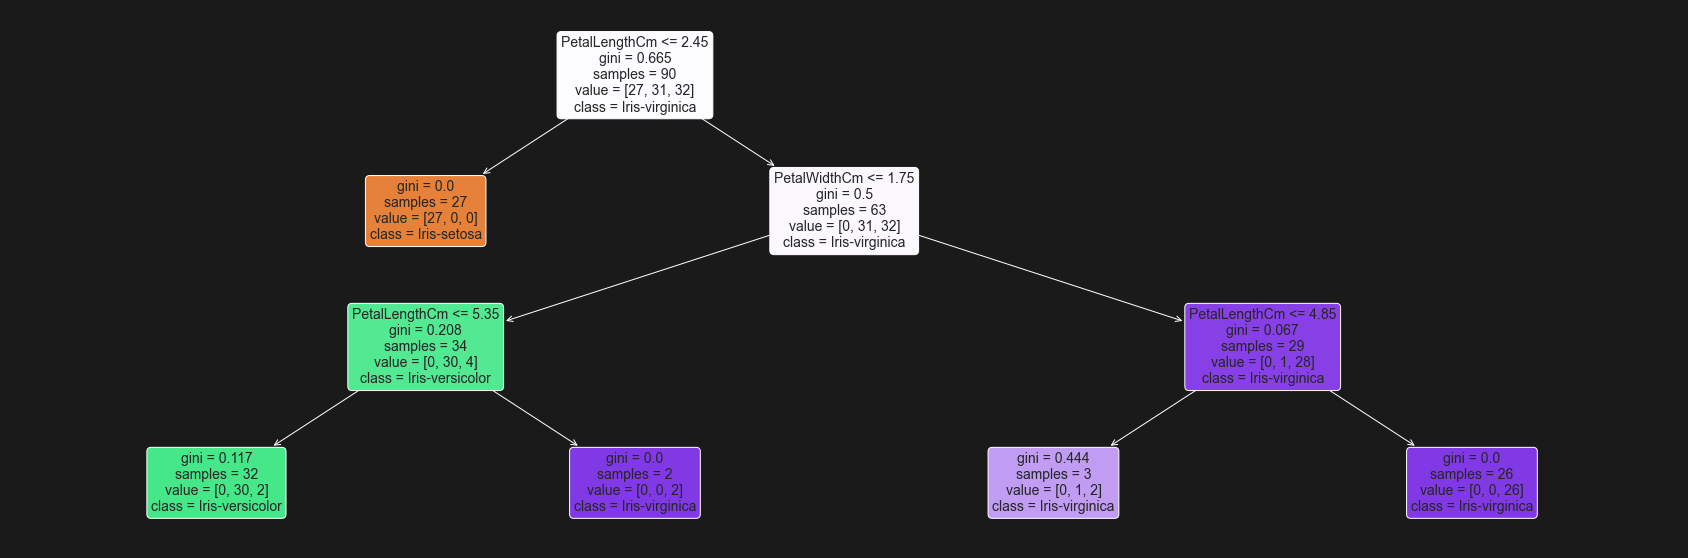

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(clf_decision_tree,
                   feature_names = feature_names,
                   class_names = y.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

2) As a text based diagram

In [13]:
from sklearn.tree import export_text
tree_rules = export_text(clf_decision_tree,
                        feature_names = features)
print(tree_rules)

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



As we can see from these results, the first split in the data is based on the `PetalLengthCm` feature of the flowers, where if Petal Length is less than or equal to 2.45 then the algorithm suggests that this is of the Iris-Setosa Class.

On the other hand, if Petal Length is greater than 2.45 gthen we get to a class that is dominated by the Iris-virginica. At this point however there are still further splits that can be made that can improve the accuracy of the model and so the next split is on `PetalWidthCm` which if it less than or equal to 1.75 it is deemed as Iris-versicolor, or Iris-vriginca otherwise. 

These splits continue at one more level until we get classes that contain all three values.

While we can see here that this results in all but 4 flows being correctly classified, we are interested in seing how the algorithm may perform on unseen data. This means that we have to use it to predict the class from our test values using the `predict()` method.

In [14]:
test_pred_decision_tree = clf_decision_tree.predict(test_x)

Given this, we are then interested in seeing how the model has performed on the unseen data. This is done by examining how well it does in terms of true positives (predicted true and actuallu true), false positives (predicted true but not actually true), false negatives (predicted false but actually true) and true negatives (predicted false and actually false). For our example this means how well it predicts individual labels, and whether it got those labels correct or incorrect.

This can be done by generating a confusion matrix which shows how the predicted label and true label match up. 

For this, we import `metrics` from the `sklearn` module, and use this to create a confusion matrix based on the actual labels (`test_lab`) and the predicted labels (`test_pred_decision_tree`). This is done using the following code:

In [15]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, 
                                            test_pred_decision_tree)

We can get the output by simply printing the confusin matrix:

In [16]:
print(confusion_matrix)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


But this doesn't look good and cannot be understood quickly in a glance. Thus, we can make this better looking using `matplotlib` and `seaborn` as follows:

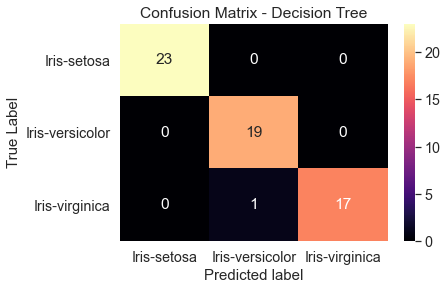

<Figure size 720x504 with 0 Axes>

In [56]:
matrix_df = pd.DataFrame(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xticklabels(['']+labels)
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_yticklabels(list(labels), rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

### Accuracy

The accuracy score is the fraction of True Positives and True negatives over the Total Number of Assigned labels:

sum(diagonals in the confusion matrix)/sum(all boxes in confusion matrix)

It is a good measure "when the target variable classes in the data are nearly balanced". It should not be used if target variables are predominantly one class

In [18]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.9833333333333333

### Precision

Precision tells us how many of the values we predicted to be in a certain class are actually in that class.

Essentially, this gives us information about model performance with respect to false positives (samples that aren't positives but are labeled as such).

For any class, it is equal to:

True positive (number in diagonal)/All positives (column sum)

In [57]:
precision = metrics.precision_score(test_lab, test_pred_decision_tree, 
                                  average=None)
precision_results = pd.DataFrame(precision, index=labels)

#renaming results column
precision_results.rename(columns={0:'Precision'}, inplace =True)

precision_results

,Precision
Iris-setosa,1.00
Iris-versicolor,0.95
Iris-virginica,1.00


### Recall

Recall tells use how many of the values in each class were given the correct label. Thus it gives us information about a classifiers performance with respect to false negatives.

For any class it is equal to:

True positive (number in diagonal)/All assignments (row sum)

In [24]:
recall = metrics.recall_score(test_lab, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)

recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
Iris-setosa,1.000000
Iris-versicolor,1.000000
Iris-virginica,0.944444


### f1

f1 is a weighted average of precision and recall score, with the best score being 1 and the worst as 0. This uses the harmonic mean as opposed to the arithemtic mean so that the value is closer to the smaller number. This prevents overestimating the performance of the model in the case where one of the two parameters is very high and the other is very low.

In [25]:
f1 = metrics.f1_score(test_lab, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

#rename results column
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
Iris-setosa,1.000000
Iris-versicolor,0.974359
Iris-virginica,0.971429


### Metrics

Of course, we can get all of these metrics in a single output with the following piece of code:

In [26]:
print(metrics.classification_report(test_lab, test_pred_decision_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



Here, the macro-average is found by averaging the unweighted mean per label and the weighted average is by everging the support-weighted mean per label. The support for each class is simply the number of occurence in each class in teh test labels.  

### Feature importance

Another useful feature of decision trees implemented through sklearn is that it allows you to calculate the feature importance in the three. This is the total amount that the gini index or entropy index (gini in our case) decreases due to splits over a given feature. 

Here, all feature importances are normalised to sum to 1 so that the importance is divided by each feature. This can be used to identify features that aren't useful by comparing them to random numbers.

In [58]:
import numpy as np
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(clf_decision_tree.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

         feature  importance
2  PetalLengthCm       0.589
3   PetalWidthCm       0.411
0  SepalLengthCm       0.000
1   SepalWidthCm       0.000


In our case, we can see that PetalLengthCM has the highest feature importance weight, which in the tree we created above, is the first division. In some cases, low feature importance doesn't mean that it isn't important for preidtcion, but that it wasn't chosen as a division in our specific case. 

This is useful when we are performing cross validation or running multiple runs of decision trees to see the average importance of each feature, for example when running random forest modules.

### What if we wanted to improve the model?

We can try to improve the results of the model by seeing how it responds to changes in hyperparameters of the model through cross validation. 

Cross validation, as seen in previous workshops, executes model training and validating on multiple subsets of the data. The aim of this is to test the model's ability to predict on data that was not used in training, and to avoid problems such as overfitting and selection bias. This is used to find the best parameters, which can then be check on final evaluation of the test data.

For our purpose, we will want to change the hyperparameters:

max_depth: the maximum depth of the tree, to make sure that it is not overfitting

min_samples_split: the minimum number of samples required to split an internal node

This is done using the following code:

In [61]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [2,3,4], 
                     'min_samples_split': [1,2,3,4,5]}]

scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall



C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\phili\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\phili\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_split': 2}

Grid scores on development set:
nan (+/-nan) for {'max_depth': 2, 'min_samples_split': 1}
0.916 (+/-0.194) for {'max_depth': 2, 'min_samples_split': 2}
0.916 (+/-0.194) for {'max_depth': 2, 'min_samples_split': 3}
0.887 (+/-0.177) for {'max_depth': 2, 'min_samples_split': 4}
0.887 (+/-0.177) for {'max_depth': 2, 'min_samples_split': 5}
nan (+/-nan) for {'max_depth': 3, 'min_samples_split': 1}
0.916 (+/-0.183) for {'max_depth': 3, 'min_samples_split': 2}
0.916 (+/-0.183) for {'max_depth': 3, 'min_samples_split': 3}
0.906 (+/-0.179) for {'max_depth': 3, 'min_samples_split': 4}
0.916 (+/-0.183) for {'max_depth': 3, 'min_samples_split': 5}
nan (+/-nan) for {'max_depth': 4, 'min_samples_split': 1}
0.916 (+/-0.194) for {'max_depth': 4, 'min_samples_split': 2}
0.905 (+/-0.179) for {'max_depth': 4, 'min_samples_split': 3}
0.905 (+/-0.179) for {'max_depth': 4, 'min_samples_split': 4}
0.905 (+/-0.179) for {'

We can see from the results that, if we were focusing on the `f1` score, the optimal would be a `max_depth` of 2 and a `min_samples_split` of 2. 

Of course, we can change the score that we are interested in, or the hyperparameters, in order to improve the model for our specific purpose.